In [6]:
#to perform mathematical operations on numerical values in the dataset
import numpy as np
#to import and manipulate details and data in a dataset
import pandas as pd
#to plot variables of a dataset
import matplotlib.pyplot as plt
#to train the dataset with Logistic regression for prediction
from sklearn.linear_model import LogisticRegression
#to split the dataset into training and testing set
from sklearn.model_selection import train_test_split
#to normalize the dataset for better comparison
from sklearn.preprocessing import StandardScaler
#for performance metrics of the tested data through trained model
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
#importing the dataset for fraud detection and displaying the first five 
transactions = pd.read_csv('fraud_detection.csv')
transactions.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
#to check for missing values and find the number of missing values in each variable
transactions.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
#create isPayment field, such that if the values of the variable 'type' is either "PAYMENT" or "DEBIT" then value of 'isPayment' is 1, otherwise the value of 'isPayment' is 0  
transactions['isPayment'] = 0
transactions['isPayment'][transactions['type'].isin(['PAYMENT', 'DEBIT'])] = 1

C:\Users\olind\AppData\Local\Temp\ipykernel_17508\3374671461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['isPayment'][transactions['type'].isin(['PAYMENT', 'DEBIT'])] = 1


In [10]:
#create isMovement field, such that if the values of the variable 'type' is either "CASH_OUT" or "TRANSFER" then value of 'isMovement' is 1, otherwise the value of 'isMovement' is 0 
transactions['isMovement'] = 0
transactions['isMovement'][transactions['type'].isin(['CASH_OUT', 'TRANSFER'])] = 1

C:\Users\olind\AppData\Local\Temp\ipykernel_17508\2762249153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['isMovement'][transactions['type'].isin(['CASH_OUT', 'TRANSFER'])] = 1


In [11]:
#create accountDiff field, which is the difference between the respective values of the 'oldbalanceOrg' and 'oldbalanceDest' fields 
transactions['accountDiff'] = 0
transactions['accountDiff'] = (transactions['oldbalanceOrg'] - transactions['oldbalanceDest']).abs()

In [12]:
#displaying the dataframe after adding 'isPayment', 'isMovement' and 'accountDiff' fields
transactions.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isPayment,isMovement,accountDiff
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,0,170136.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,0,21249.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,1,181.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,21001.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,0,41554.0


In [13]:
#Independent variables are features and the dependent variable is a newly created variable 'isFraud' 
features = transactions[['amount', 'isPayment', 'isMovement', 'oldbalanceDest', 'newbalanceDest']]
label = transactions[['isFraud']]

In [14]:
#the information on the dataset after adding the new features
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
 11  isPayment       int64  
 12  isMovement      int64  
 13  accountDiff     float64
dtypes: float64(6), int64(5), object(3)
memory usage: 679.6+ MB


In [15]:
#finding information on the numerical variables of the dataset
transactions.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isPayment,isMovement,accountDiff
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06,3.446579e-01,4.354195e-01,1.563497e+06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03,4.752566e-01,4.958119e-01,4.027698e+06
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.016600e+04
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.145337e+05
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.311500e+06
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.560159e+08


In [16]:
#splitting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(features, label, random_state = 251, train_size = 0.8)

In [17]:
#Initializing the object for standard normalization
scaler = StandardScaler()

In [18]:
#fitting and transforming the data into the Standard normalization object
x_train = scaler.fit_transform(x_train)

In [19]:
#transforming the test independent data into normalization
x_test = scaler.transform(x_test)

In [20]:
#initialize object for Logistic Regression to classify the data into fraudulent transactions and non-fraudulent transactions
lr = LogisticRegression().fit(x_train, y_train)

C:\Users\olind\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
#predict the fraudent transactions based on created features
y_predicted = lr.predict(x_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
#finding the scoring for training data
lr.score(x_train, y_train)

0.998847958859715

In [23]:
#finding the score for testing data
lr.score(x_test, y_test)

0.9989485463535461

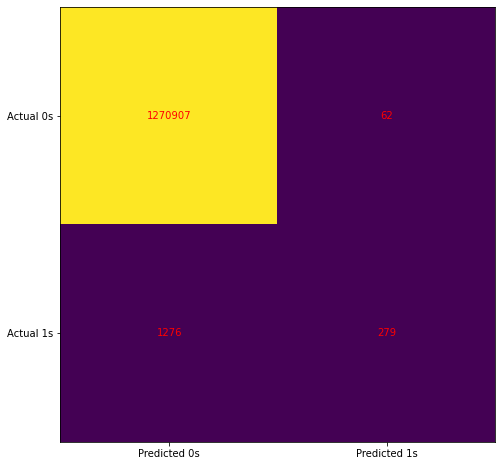

In [24]:
#Performance metrics for logistic regression

#creating the confusion matrix for true negative, false positive, false negative and true positive values
cm = confusion_matrix(y_test, y_predicted)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()